In [42]:
import pandas as pd
import numpy as np
# Загрузка датасета 
df = pd.read_csv('../pollution_dataset.csv')


# Задание 1.

Выберите датасет, который имеет отношение к вашей области интересов или исследований. Датасет должен содержать неструктурированные данные, требующие разметки для решения конкретной задачи, например, анализа настроений или распознавания именованных сущностей

Поля:

Temperature (°C): Средняя температура по региону.

Humidity (%): Относительная влажность, зафиксированная в регионе.

PM2.5 Concentration (µg/m³): Содержание мелких твердых частиц.

PM10 Concentration (µg/m³): Содержание крупных частиц.

NO2 Concentration (ppb): Содержание диоксида азота.

SO2 Concentration (ppb): содержание диоксида серы.

CO Concentration (ppm): Содержание монооксида углерода.

Proximity to Industrial Areas (km): Расстояние до ближайшей промышленной зоны.

Population Density (people/km²): Количество человек на квадратный километр в регионе.

In [43]:
df.head(10)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,27.2,51.7,35.1,46.2,26.7,32.2,0.98,11.2,314,Hazardous
1,26.3,59.3,1.0,6.2,38.3,20.4,0.68,13.5,298,Good
2,27.9,73.2,20.0,39.4,19.6,5.8,0.95,5.4,309,Good
3,23.9,51.9,14.7,24.3,5.2,12.6,1.24,4.5,282,Poor
4,25.2,59.0,26.3,30.9,26.8,13.5,1.06,5.6,293,Poor
5,22.7,61.4,4.3,3.2,11.1,21.0,0.59,5.6,290,Good
6,31.2,67.9,49.6,62.4,26.2,14.3,1.47,4.0,313,Good
7,25.1,56.9,36.8,58.7,20.4,20.4,0.82,0.4,300,Poor
8,35.7,75.4,101.7,115.4,36.9,2.1,1.03,2.4,295,Moderate
9,24.3,61.6,0.2,15.1,26.1,17.0,0.64,1.7,311,Moderate


In [34]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.464580,60.068140,29.905580,40.003700,21.00036,15.141060,0.904314,5.031880,299.948200
std,5.486219,15.044806,30.285899,30.693124,11.30099,7.668466,0.297840,5.010352,17.215133
min,3.500000,10.000000,0.000000,-1.400000,-13.50000,0.000000,-0.080000,0.000000,243.000000
25%,21.800000,49.900000,8.500000,18.900000,13.80000,9.900000,0.700000,1.500000,288.000000
50%,25.300000,60.200000,20.600000,31.100000,20.50000,15.100000,0.905000,3.500000,300.000000
75%,28.900000,70.100000,41.500000,51.500000,27.50000,20.400000,1.100000,6.900000,311.000000
max,46.200000,100.000000,249.000000,256.100000,96.40000,41.700000,2.140000,46.300000,358.000000


Цель данных исследований - создать модель, прогнозирующую возможность возникновения рака легких у жителей данных районов на данных о наличии воздухе вредных веществ. Для этого для каждого района будет проставлен маркер: "Высокий риск", "Риск есть", "Нет риска".

# Задание 2.
Выполните разметку на основе правил (rule-based labeling) на подмножестве выбранного датасета. Разработайте и реализуйте набор правил или условий, которые позволят автоматически присваивать метки данным на основе определенных шаблонов или критериев.

Предположим, что "Высокий риск" возникает если температура выше 25 градусов, содержание диоксида азота выше 30 и диоксита серы выше 20; "Риск есть" соответственно 25, 20, 15 и "Нет риска" все остальное.


In [44]:
def risk_lable(row):
    if row['Temperature'] >= 25 and row['NO2'] >= 30 and row['SO2'] >= 20:
        return 'Hi risk'
    elif row['Temperature'] >= 25 and row['NO2'] >= 20 and row['SO2'] >= 15:
        return 'Risk'
    else:
        return 'No risk'

In [45]:
df['risk_lable'] = df.apply(risk_lable, axis=1)

In [46]:
df['risk_lable'].value_counts()

risk_lable
No risk    4308
Risk        566
Hi risk     126
Name: count, dtype: int64

<Axes: >

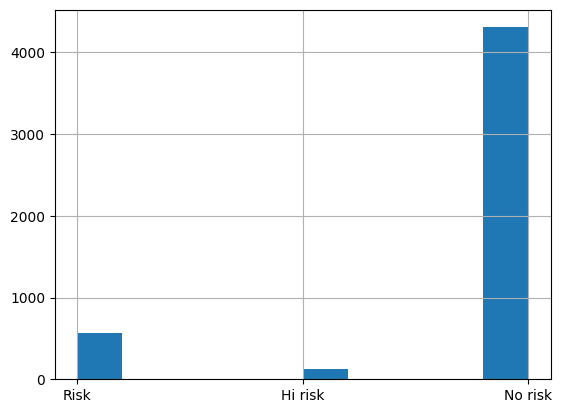

In [47]:
df['risk_lable'].hist()

# Задача 3.
Выполните разметку вручную отдельного подмножества выбранного датасета с помощью выбранного вами инструмента разметки.

In [48]:
# Выделим из общего набора данных необходимые данные для ручной разметки в отдельный файл
subset=df.sample(frac=0.01)
subset.to_csv('../pollution_subset.csv')
# Разметка  для 50 регионов проведена в Label Studio

# Задача 4.
Объедините данные, размеченные вручную, с данными, размеченными на основе правил. Объедините два подмножества размеченных данных в один набор данных, сохранив при этом соответствующую структуру и целостность.

In [49]:
df.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality',
       'risk_lable'],
      dtype='object')

In [52]:
# Загрузка датасета с ручной разметкой
manual_df = pd.read_csv('../pollution_subset.csv', engine='python')

# Объдиняем существующий датасет с датасетом с размеченными вручную значениями

df = pd.merge(df, manual_df, on = ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'], how = 'left')
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality,risk_lable_x,Unnamed: 0,risk_lable_y
0,27.2,51.7,35.1,46.2,26.7,32.2,0.98,11.2,314,Hazardous,Risk,0.0,Risk
1,26.3,59.3,1.0,6.2,38.3,20.4,0.68,13.5,298,Good,Hi risk,NaN,NaN
2,27.9,73.2,20.0,39.4,19.6,5.8,0.95,5.4,309,Good,No risk,NaN,NaN
3,23.9,51.9,14.7,24.3,5.2,12.6,1.24,4.5,282,Poor,No risk,NaN,NaN
4,25.2,59.0,26.3,30.9,26.8,13.5,1.06,5.6,293,Poor,No risk,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29.3,36.8,80.3,90.9,9.2,14.1,0.97,10.2,287,Moderate,No risk,NaN,NaN
4996,15.7,51.7,0.7,11.4,40.5,13.8,1.07,4.2,320,Good,No risk,NaN,NaN
4997,27.8,48.1,8.9,16.4,8.6,17.7,0.54,0.3,302,Moderate,No risk,NaN,NaN
4998,30.4,50.4,2.2,18.8,13.1,22.3,0.94,6.7,308,Moderate,No risk,4998.0,No risk


In [ ]:
df = df.drop('risk_lable_y', axis=1) 
df.rename(columns={'risk_lable_x': 'risk_lable'}, inplace=True)
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality,risk_lable,Unnamed: 0
0,27.2,51.7,35.1,46.2,26.7,32.2,0.98,11.2,314,Hazardous,Risk,0.0
1,26.3,59.3,1.0,6.2,38.3,20.4,0.68,13.5,298,Good,Hi risk,NaN
2,27.9,73.2,20.0,39.4,19.6,5.8,0.95,5.4,309,Good,No risk,NaN
3,23.9,51.9,14.7,24.3,5.2,12.6,1.24,4.5,282,Poor,No risk,NaN
4,25.2,59.0,26.3,30.9,26.8,13.5,1.06,5.6,293,Poor,No risk,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29.3,36.8,80.3,90.9,9.2,14.1,0.97,10.2,287,Moderate,No risk,NaN
4996,15.7,51.7,0.7,11.4,40.5,13.8,1.07,4.2,320,Good,No risk,NaN
4997,27.8,48.1,8.9,16.4,8.6,17.7,0.54,0.3,302,Moderate,No risk,NaN
4998,30.4,50.4,2.2,18.8,13.1,22.3,0.94,6.7,308,Moderate,No risk,4998.0


# Задача 5.
Обучите модель машинного обучения, используя объединенный набор размеченных данных. Разделите датасет на обучающий и тестовый наборы и используйте обучающий набор для обучения модели.

In [57]:
import pathlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [55]:
# Перекодирование категориальной переменной
label_encoder = LabelEncoder()
df['risk_lable'] = label_encoder.fit_transform(df['risk_lable'])
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality,risk_lable,Unnamed: 0
0,27.2,51.7,35.1,46.2,26.7,32.2,0.98,11.2,314,Hazardous,2,0.0
1,26.3,59.3,1.0,6.2,38.3,20.4,0.68,13.5,298,Good,0,NaN
2,27.9,73.2,20.0,39.4,19.6,5.8,0.95,5.4,309,Good,1,NaN
3,23.9,51.9,14.7,24.3,5.2,12.6,1.24,4.5,282,Poor,1,NaN
4,25.2,59.0,26.3,30.9,26.8,13.5,1.06,5.6,293,Poor,1,NaN


In [56]:
# Разделение выборок на обучающую и тестовую
X = df[['Temperature', 'NO2', 'SO2']].values
y = df['risk_lable'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
# Определяем простую модель ИНС прямого распространения 
# с тремя слоями нейронов для трех входных переменных и трех выходов.

model = Sequential([
    Dense(10, input_dim=3, activation='relu'),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')
])

c:\Users\rukavishnikovav\Python\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
# Компиляция модели
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [60]:
# Обучение модели
history = model.fit(X_train, y_train, epochs=75, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/75
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1858 - loss: 11.1531 - val_accuracy: 0.8113 - val_loss: 0.7991
Epoch 2/75
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8462 - loss: 0.7009 - val_accuracy: 0.8627 - val_loss: 0.6304
Epoch 3/75
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8607 - loss: 0.5851 - val_accuracy: 0.8587 - val_loss: 0.5455
Epoch 4/75
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8484 - loss: 0.5202 - val_accuracy: 0.8613 - val_loss: 0.5071
Epoch 5/75
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8487 - loss: 0.4929 - val_accuracy: 0.8587 - val_loss: 0.4789
Epoch 6/75
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8487 - loss: 0.4984 - val_accuracy: 0.8620 - val_loss: 0.4589
Epoch 7/75
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8487 - loss: 0.4625 - val_accuracy: 0.8627 - val_loss: 0.4437
Epoch 8/75
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8566 - loss: 0.4286 - val_accuracy: 0

# Задача 6.
Оценить эффективность обученной модели на тестовом датасете. Используйте подходящие метрики оценки. Интерпретируйте результаты и проанализируйте эффективность модели в решении задачи разметки.

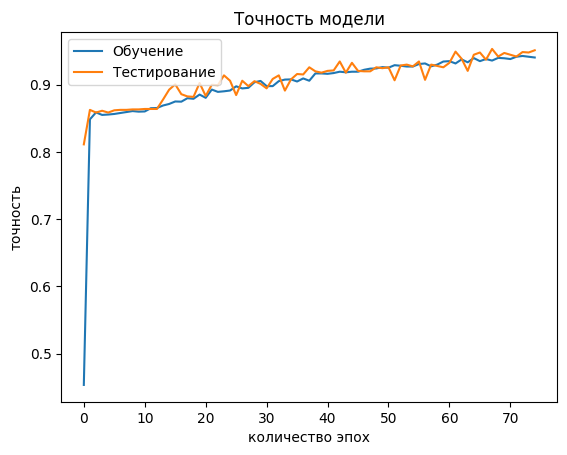

In [61]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['Обучение', 'Тестирование'], loc='upper left')
plt.show()

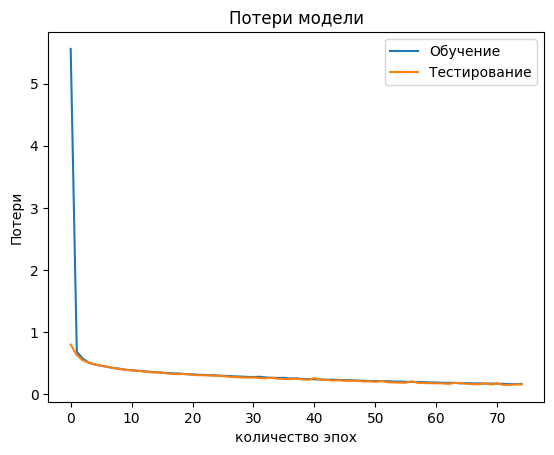

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['Обучение', 'Тестирование'], loc='upper right')
plt.show()

In [63]:
# Расчет некоторых других метрик качества модели
loss, accuracy = model.evaluate(X_test, y_test)
y_test_predicted = np.argmax(model.predict(X_test), axis=1)
f1 = f1_score(y_test, y_test_predicted, average='weighted')
print(f'Test Loss (Потери): {loss},\nTest Accuracy (Точность): {accuracy}')
print(f'F-score = {f1}')

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9536 - loss: 0.1592
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test Loss (Потери): 0.15893246233463287,
Test Accuracy (Точность): 0.9513333439826965
F-score = 0.9453087356783331


 Точность: 0.9513333439826965